# ASR

In [1]:
# from ASRCode.asr import ASR
# !pip install pyriemann

In [2]:
!pip install pyedflib

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
^C
ERROR: Operation cancelled by user


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyedflib

In [4]:
raw = np.load('eeg_raw.npy')
sfreq = 250

FileNotFoundError: [Errno 2] No such file or directory: 'eeg_raw.npy'

In [ ]:
raw.shape

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=sfreq, method='euclid', blocksize=10)
train_idx = np.arange(0 * sfreq, 30 * sfreq, dtype=int)
_, sample_mask = asr.fit(raw[:, train_idx])

In [ ]:
clean, mask = asr.transform(raw)

In [ ]:
clean.shape

In [ ]:
mask.shape

In [ ]:
def separate_array(array_in):
  start = 0
  end = 0
  list_arrays = []
  for id in np.arange(1,len(array_in)):
    end = id
    if array_in[id] != array_in[id-1]+1:
      # print(array_in[id])
      # print(array_in[id-1])
      list_arrays.append(array_in[start:end])
      start = end
  return list_arrays

In [ ]:
mask_ids = np.where(mask==False)[0]

In [ ]:
mask_ids.shape

In [ ]:
list_segments = separate_array(mask_ids)

In [ ]:
times = np.arange(raw.shape[-1]) / sfreq
f, ax = plt.subplots(8, sharex=True, figsize=(20, 12))
for i in range(8):
  ax[i].plot(times, raw[i], lw=.5, label='before ASR')
  ax[i].plot(times, clean[i], label='after ASR', lw=.5)
  ax[i].set_ylim([-50, 50])
  ax[i].set_ylabel(f'ch{i}')
  ax[i].set_yticks([])
  # print(range(len(mask_ids)-1))
  j=0
  for array in list_segments:
    # print(tmp_ids)
    ax[i].fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax[i].get_xaxis_transform())
    j += 2
ax[i].set_xlabel('Time (s)')
ax[0].legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

In [ ]:
times = np.arange(6250) / sfreq #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, raw[7,0:6250], lw=.5, label='before ASR')
ax.plot(times, clean[7,0:6250], label='after ASR', lw=.5)
ax.set_ylim([-50, 50])
ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/sfreq <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

## Tested on our data

In [ ]:
edf_in = pyedflib.EdfReader('epoch2.edf')

In [ ]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [ ]:
N=edf_in.getNSamples()[0]

In [ ]:
chns = np.arange(nch)
signal = np.array([], dtype=np.int64).reshape(0,N)
for chan in chns:
  chn_sig = edf_in.readSignal(chan)
  signal = np.vstack([signal, chn_sig])
signal.shape

In [ ]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
t = np.arange(0,N)/srate

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=srate, method='euclid', blocksize=10)
train_idx = np.arange(0 * srate, 30 * srate, dtype=int)
_, sample_mask = asr.fit(signal[:, train_idx])

In [ ]:
clean, mask = asr.transform(signal)

In [ ]:
mask.shape

In [ ]:
clean.shape

In [ ]:
np.logical_not(mask[0,0:10])

In [ ]:
mask[:,0:10]

In [ ]:
mask_final = np.logical_not(mask[0,:])
for i in np.arange(2,mask.shape[0]):
  tmp = np.logical_not(mask[i,:])
  mask_final = np.logical_or(mask_final,tmp)
mask_final[0:10]

In [ ]:
mask_ids = np.where(mask_final==True)[0]

In [ ]:
mask_ids

In [ ]:
list_segments = separate_array(mask_ids)

In [ ]:
end_time_id = int(25*srate)
times = np.arange(end_time_id) / srate #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, signal[10,0:end_time_id], lw=.5, label='before ASR')
ax.plot(times, clean[10,0:end_time_id], label='after ASR', lw=.5)
# ax.set_ylim([-50, 50])
# ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/srate <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / srate, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

# Autoreject


In [ ]:
# !pip install autoreject
!pip install h5io
import autoreject.autoreject


In [ ]:
# !pip install mne
import mne

In [ ]:
import numpy as np
# !pip install pyedflib
import pyedflib

In [ ]:
def get_montage(ch_pos, subject, subjects_dir):
    """Get montage given Surface RAS (aka mri coordinates in MNE)
    Parameters
    ----------
    ch_pos : dict
        Dictionary of channel positions. Keys are channel names and values
        are 3D coordinates - array of shape (3,) - in native digitizer space
        in m.
    subject ： str
        the name of subject in FreeSurfer
    subjects_dir : str
        the directory of your FreeSurfer subject directory

    Returns : head montage
    -------
        
    """
    subj_trans = mne.coreg.estimate_head_mri_t(subject, subjects_dir)
    mri_to_head_trans = mne.transforms.invert_transform(subj_trans)
    print('Start transforming mri to head')
    print(mri_to_head_trans)

    montage_mri = mne.channels.make_dig_montage(ch_pos, coord_frame='mri')
    montage = montage_mri.copy()
    montage.add_estimated_fiducials(subject, subjects_dir)
    montage.apply_trans(mri_to_head_trans)
    return montage_mri, montage

In [ ]:
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [ ]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [ ]:
labels[0:10]

In [ ]:
# Load positions
import pandas as pd
elec_pos = pd.read_csv('/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv', sep='\t')
elec_pos.head()

In [ ]:
def get_chn_positions(chn_df):
    chn_pos = {}
    for i in np.arange(len(chn_df)):
        label = elec_pos.loc[[i], ['label']].values[0][0]
        pos = elec_pos.loc[[i], ['x','y','z']].values[0]/1000
        pos = pos.tolist()
        chn_pos[label] = pos
    return chn_pos

In [ ]:
chn_pos = get_chn_positions(elec_pos)

In [ ]:
labels.index(list(chn_pos.keys())[0])

In [ ]:
N=edf_in.getNSamples()[0]
N

In [ ]:
import pandas as pd

annot2 = edf_in.readAnnotations()
annot2 = {
    'Onset': annot2[0],
    'Duration': annot2[1],
    'event': annot2[2]
}
annot2 = pd.DataFrame(annot2)
annot2.head()

In [ ]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
t = np.arange(0, N)/srate
t_test = np.argmin((np.abs(t-annot2.Onset.to_numpy()[2])))
srate # Time to final of epoch

In [ ]:
signal = np.array([], dtype=np.int64).reshape(0,t_test)
keys = list(chn_pos.keys())
for chan in keys:
    id_ch = labels.index(chan)
    chn_sig = edf_in.readSignal(id_ch)
    signal = np.vstack([signal, chn_sig[0:t_test]])
signal.shape

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(signal[0,:])

In [ ]:
n_epoch = int(5*srate) # 5 seconds
signal.shape[1]/n_epoch

In [ ]:
signal_epoch = np.zeros((int(signal.shape[1]/n_epoch), signal.shape[0], n_epoch))
id = 0
for epoch_id in np.arange(int(signal.shape[1]/n_epoch)):
  tmp = signal[:,id:id+n_epoch]
  signal_epoch[epoch_id,:,:] = tmp
  id += n_epoch
signal_epoch.shape

In [ ]:
info = mne.create_info(ch_names=keys,
                       ch_types=['seeg'] * len(keys),
                       sfreq=srate)

In [ ]:
mne_epochs = mne.EpochsArray(signal_epoch, info)

In [ ]:
edf_in.close()

In [ ]:
_, montage = get_montage(chn_pos, 'sub-P079', '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/')

In [ ]:
mne_epochs.set_montage(montage)

In [ ]:
from autoreject.autoreject import AutoReject, compute_thresholds
exclude = []  # XXX
picks = mne.pick_types(mne_epochs.info, meg='grad', exclude=exclude)
ar = AutoReject(random_state=42, n_jobs=-1, verbose=True)

In [ ]:
epochs_ar, reject_log = ar.fit_transform(mne_epochs, return_log=True)

In [ ]:
scalings = dict(seeg=500)
reject_log.plot_epochs(mne_epochs, scalings=scalings)

In [ ]:
epochs_ar.plot(scalings=scalings)


In [ ]:
epochs_ar.plot_drop_log()

In [ ]:
import numpy as np  # noqa
import matplotlib.pyplot as plt  # noqa
import matplotlib.patches as patches  # noqa
from autoreject import set_matplotlib_defaults  # noqa

set_matplotlib_defaults(plt, style='seaborn-white')
loss = ar.loss_['seeg'].mean(axis=-1)  # losses are stored by channel type.

plt.matshow(loss.T * 1e6, cmap=plt.get_cmap('viridis'))
plt.xticks(range(len(ar.consensus)), ['%.1f' % c for c in ar.consensus])
plt.yticks(range(len(ar.n_interpolate)), ar.n_interpolate)

# Draw rectangle at location of best parameters
ax = plt.gca()
idx, jdx = np.unravel_index(loss.argmin(), loss.shape)
rect = patches.Rectangle((idx - 0.5, jdx - 0.5), 1, 1, linewidth=2,
                         edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.xaxis.set_ticks_position('bottom')
plt.xlabel(r'Consensus percentage $\kappa$')
plt.ylabel(r'Max sensors interpolated $\rho$')
plt.title('Mean cross validation error (x 1e6)')
plt.colorbar()
plt.show()

In [ ]:
mne_epochs.average().plot(spatial_colors=True)
epochs_ar.average().plot(spatial_colors=True)

In [ ]:
ar.get_reject_log(mne_epochs).plot()

In [ ]:
cleaned = epochs_ar.get_data()
cleaned.shape

In [ ]:
orig = mne_epochs.get_data()
orig.shape

# Test my code

In [1]:
from clean_seeg import cleanSEEG

In [3]:
!pip install h5io

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic/h5io-0.1.7+computecanada-py3-none-any.whl


In [2]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

## Using PLIremoval

In [ ]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'PLIremoval', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 8)

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)
# clean = seegTF.clean_epochs(return_interpolated=False)

In [ ]:
df_epochs

In [ ]:
interpolated.shape

In [ ]:
srate = 2048.0
614528 - int(srate*5)*4

In [ ]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [ ]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

In [ ]:
plt.plot(clean[0,:])
plt.ylim([400,-400])

In [ ]:
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [ ]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [ ]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

In [ ]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [ ]:
edf_in.close()

## Using Zapline

In [4]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.5, 1.5], #I set it to [0.5, 1.5] to improve comp cost
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5)

In [5]:
out_edf_path_clean = '/scratch/mcesped/code/sEEGPrep/Results/test_clean.edf'
out_edf_path_int = '/scratch/mcesped/code/sEEGPrep/Results/test_int.edf'

In [6]:
%%time
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True, 
                                                     write_edf_clean = True,
                                                     out_edf_path_clean = out_edf_path_clean,
                                                     write_edf_int = True,
                                                     out_edf_path_int = out_edf_path_int)

491521
Removing line noise
caca
2
3
PLI removal completed.
(80, 491521)
Removing drifts
5140
aqui
lolo
(80, 491521)
Running autoreject
Start transforming mri to head
<Transform | MRI (surface RAS)->head>
[[ 0.99522067  0.03380816 -0.09161239 -0.00202999]
 [-0.03087106  0.99896884  0.03329013  0.02576594]
 [ 0.0926434  -0.03030285  0.99523813  0.04037436]
 [ 0.          0.          0.          1.        ]]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=seeg


/local/mcesped.4338832.0/tmp/kslurm-venv-d2iwl786/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 80/80 [00:00<00:00,   82.20it/s]
100%|██████████| Computing thresholds ... : 80/80 [01:41<00:00,    1.27s/it]


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   99.16it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,   95.22it/s]

 10%|█         | Repairing epochs : 5/48 [00:00<00:00,   79.49it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,   72.99it/s]

 15%|█▍        | Repairing epochs : 7/48 [00:00<00:00,   70.05it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,   68.44it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   69.53it/s]

 25%|██▌   





Estimated consensus=0.50 and n_interpolate=32




  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   86.44it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,   85.82it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,   85.89it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,   87.08it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   87.64it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,   87.20it/s]

 29%|██▉       | Repairing epochs : 14/48 [00:00<00:00,   87.67it/s]

 33%|███▎      | Repairing epochs : 16/48 [00:00<00:00,   87.90it/s]

 38%|███▊      | Repairing epochs : 18/48 [00:00<00:00,   88.71it/s]

 42%|████▏     | Repairing epochs : 20/48 [00:00<00:00,   89.42it/s]

 46%|████▌     | Repairing epochs : 22/48 [00:00<00:00,   89.95it/s]

 50%|█████     | Repairing epochs : 24/48 [00:00<00:00,   88.80it/s]

 54%|█████▍    | Repairing epochs : 26/48 [00:00<00:00,   88.65it/s]

 58%|█████▊    | Repairing 

Dropped 2 epochs: 11, 33
(46, 80, 10240)
(80, 614528)


len annot 3
len n_rem 4
Channel part


CRITICAL:root:Currently, writing the EDF file for the interpolated signal is not supported.


CPU times: user 20min 19s, sys: 5min 33s, total: 25min 53s
Wall time: 14min 31s


In [ ]:
# clean, df_epochs = clean_epochs(edf_path, chn_csv_path, subject, subjects_dir, trsfPath=trsfPath, time_epoch=5)

In [7]:
df_epochs

,Epoch #,Start ID,End ID,LMiLs1,LMiLs2,LMiLs3,LMiLs4,LMiLs5,LMiLs6,LMiLs7,...,RSLs1,RSLs2,RSLs3,RSLs4,RSLs5,RSLs6,RSLs7,RSLs8,RSLs9,RSLs10
0,1,0,10240,C,C,C,C,C,C,C,...,N,N,C,C,N,N,C,C,C,C
1,2,10240,20480,C,C,C,C,C,C,C,...,C,N,C,C,N,N,C,C,C,C
2,3,20480,30720,N,C,C,C,N,C,N,...,N,N,N,C,N,N,C,C,C,C
3,4,30720,40960,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
4,5,40960,51200,N,C,C,C,N,C,N,...,N,N,N,C,C,C,C,C,C,C
5,6,51200,61440,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
6,7,61440,71680,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
7,8,71680,81920,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
8,9,81920,92160,C,C,C,C,C,C,C,...,C,C,C,C,N,N,C,C,C,C
9,10,92160,102400,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C


In [8]:
clean.shape #491521

(80, 614528)

In [9]:
interpolated.shape

(80, 594048)

In [10]:
srate = 2048.0
614528 - int(srate*5)*2

594048

In [11]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')


In [33]:
# edf_in.getSignalLabels()[0:3]
edf_in.getPhysicalMaximum(3)

-8711.0

### Time domain plots

(400.0, -400.0)

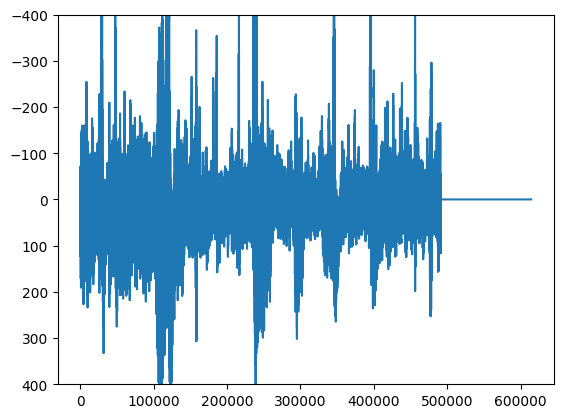

In [12]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

(400.0, -400.0)

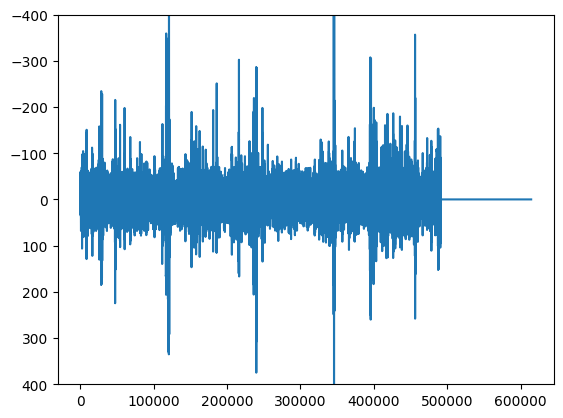

In [13]:
plt.plot(clean[0,:])
plt.ylim([400,-400])

(400.0, -400.0)

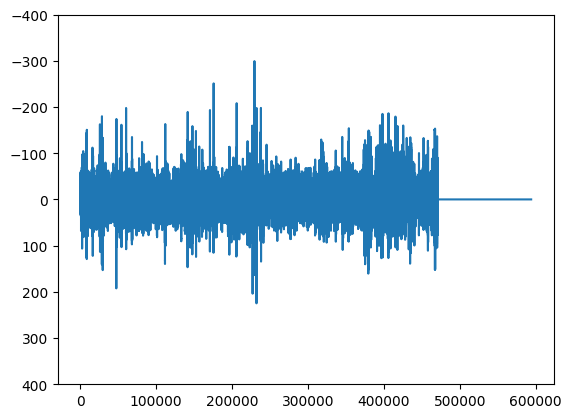

In [14]:
import matplotlib.pyplot as plt
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

(400.0, -400.0)

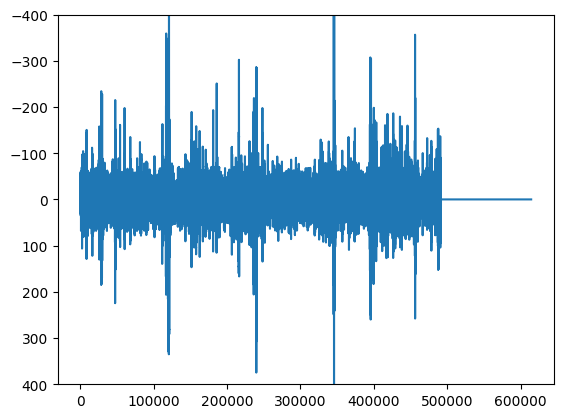

In [30]:
edf_clean = pyedflib.EdfReader(out_edf_path_clean)
chn_sig_clean = edf_clean.readSignal(0)
plt.plot(chn_sig_clean)
plt.ylim([400,-400])

In [29]:
edf_clean.close()

In [31]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
srate

2048.0

In [32]:
srate = edf_clean.getSampleFrequencies()[0]/edf_clean.datarecord_duration
srate

2048.0

In [27]:
clean[0,:]/chn_sig_clean

array([-8.96438529e-06,  3.08801704e-01,  1.02291192e+00, ...,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

### Frequency domain plots

In [16]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [17]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

(0.0, 100.0)

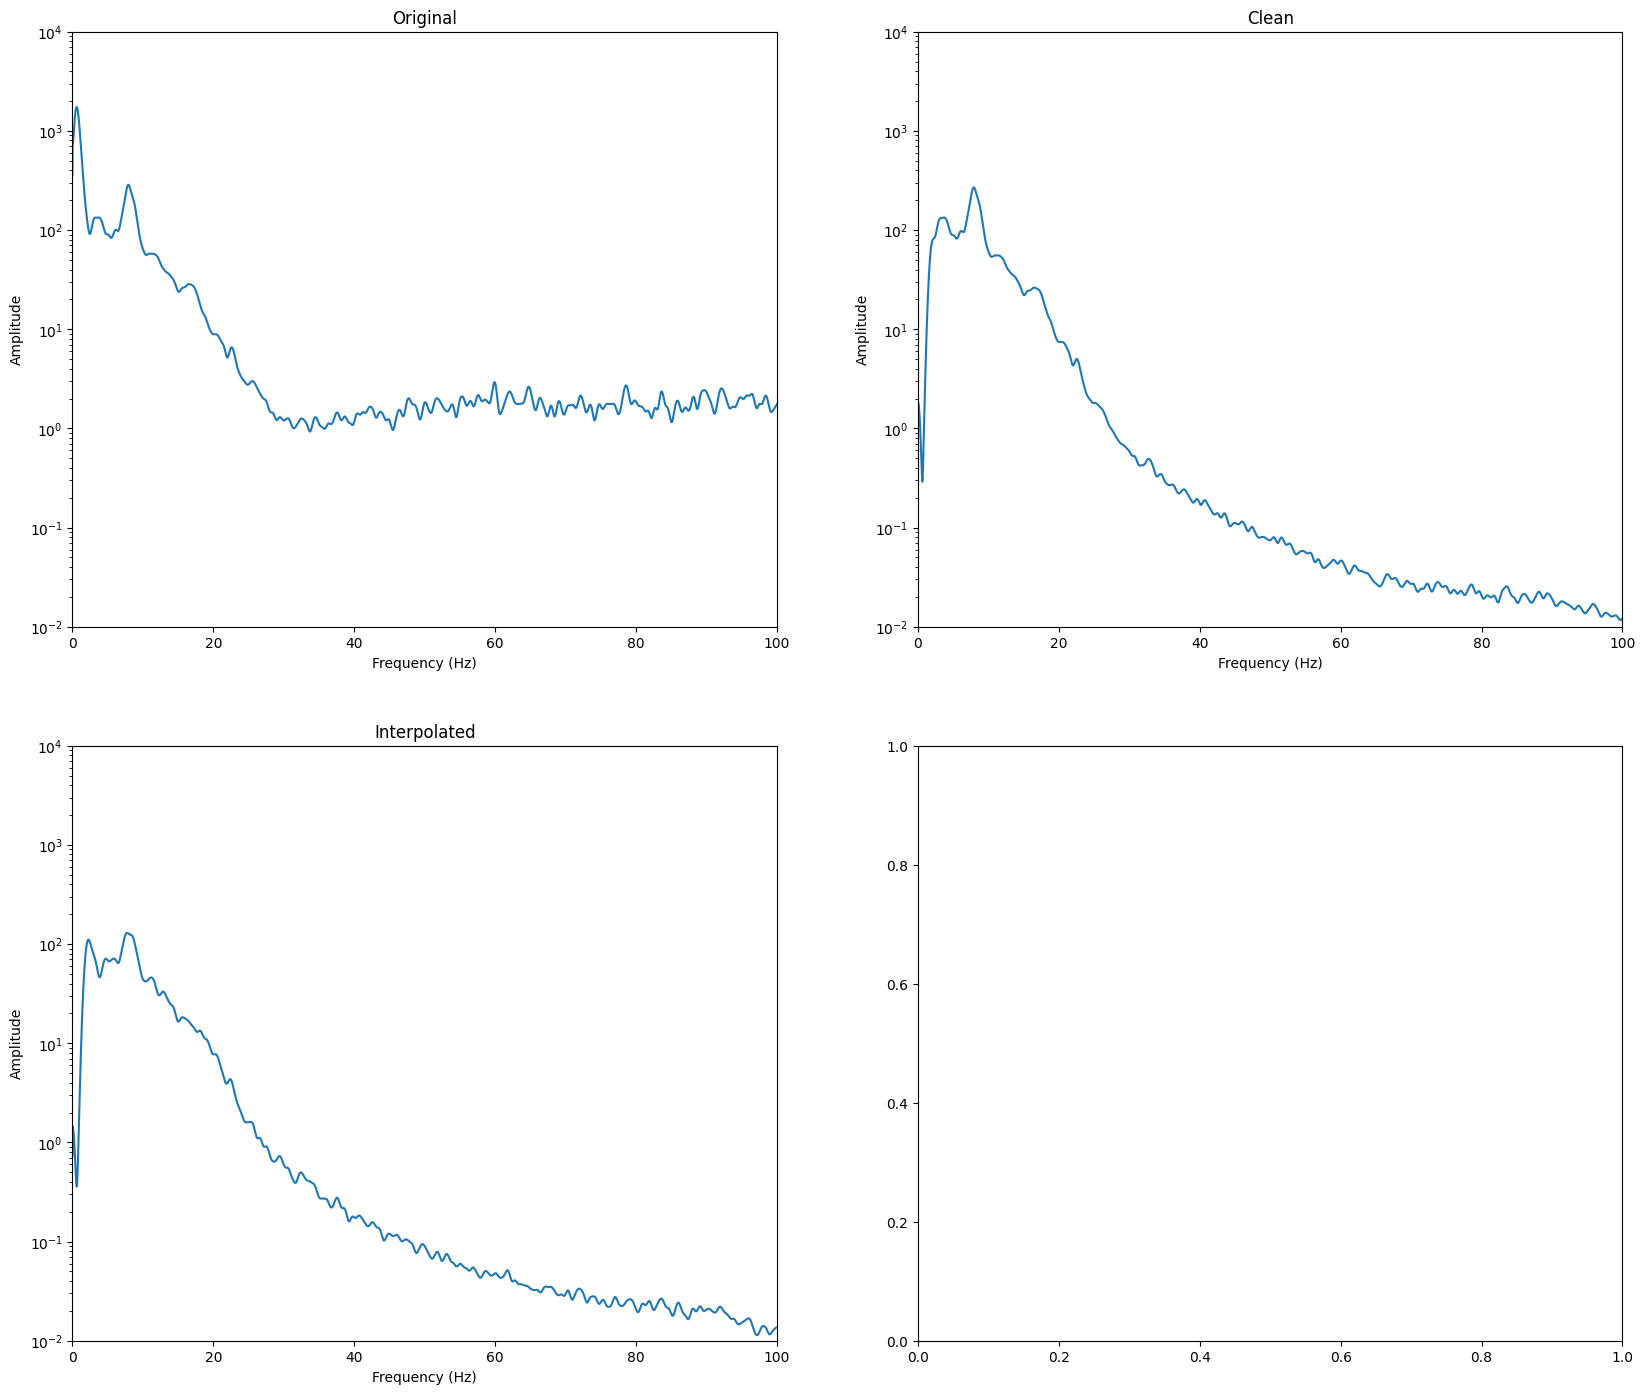

In [22]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [34]:
edf_in.close()

In [ ]:
# Check files created

## Using Cleanline

In [ ]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Cleanline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 8)

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)

In [ ]:
df_epochs

In [ ]:
interpolated.shape

In [ ]:
srate = 2048.0
614528 - int(srate*5)*4

In [ ]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [ ]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clean[0,:])
plt.ylim([400,-400])

In [ ]:
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [ ]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [ ]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

In [ ]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [ ]:
edf_in.close()

## Using Notch filtering

In [ ]:
# Testing class with notch filtering
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'NotchFilter', 
                   lineFreq = 60,
                   bandwidth = 4,
                   n_harmonics = 3,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 2)

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)

In [ ]:
df_epochs

In [ ]:
clean.shape #491521

In [ ]:
interpolated.shape

In [ ]:
srate = 2048.0
614528 - int(srate*5)*4

In [ ]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')


In [ ]:
edf_in.getSignalLabels()[0:3]

In [ ]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clean[0,:])
plt.ylim([400,-400])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [ ]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [ ]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

In [ ]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

# Rereference

In [1]:
from clean_seeg import cleanSEEG

In [ ]:
!pip install h5io

In [2]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

In [3]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 4)

In [4]:
# rereference(self, aparc_aseg_path, out_edf_path, out_tsv_path):
aparc_aseg_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P079/mri/aparc+aseg.orig.mgz'
out_edf_path = '/scratch/mcesped/code/sEEGPrep/Results/test.edf'
out_tsv_path = '/scratch/mcesped/code/sEEGPrep/Results/test.tsv'

In [5]:
df_cols = {
            'type': 'type',
            'label': 'label',
            'x': 'x',
            'y': 'y',
            'z': 'z',
            'group': 'orig_group'
        }

In [ ]:
seegTF.rereference(out_edf_path, write_tsv = False, out_tsv_path = out_tsv_path, df_cols = df_cols)

In [ ]:
df = seegTF.identify_regions(aparc_aseg_path,
                         use_reref = True,
                         write_tsv = True,
                         out_tsv_path = out_tsv_path,
                         df_cols = df_cols,
                         use_clean = False,
                         discard_wm_un = True,
                         write_edf = True,
                         out_edf_path = out_edf_path)

In [ ]:
df

In [6]:
df2 = seegTF.identify_regions(aparc_aseg_path,
                             use_reref = False,
                             write_tsv = True,
                             out_tsv_path = out_tsv_path,
                             df_cols = df_cols,
                             use_clean = False,
                             discard_wm_un = True,
                             write_edf = True,
                             out_edf_path = out_edf_path)

['type', 'label', 'x', 'y', 'z', 'orig_group']


len annot 3
len n_rem 4
['LMiLs7', 'LMiLs8', 'LMiLs9', 'RACg9', 'RACg10', 'RAOFr1', 'RAOFr5', 'RAOFr7', 'RAOFr9', 'RASSMA2', 'RASSMA3', 'RASSMA7', 'RASSMA8', 'RPLs9', 'RPLs10', 'RPOFr1', 'RPOFr9', 'RSLs1', 'RSLs3', 'RSLs4', 'RSLs6']
range(0, 21)
Channel part


In [ ]:
df2

In [ ]:
dicts

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(use_rereference= Trreturn_interpolated=True)

# Downsampling

In [1]:
from clean_seeg import cleanSEEG

In [2]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

In [4]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.5, 1.5], #I set it to [0.5, 1.5] to improve comp cost
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5)

In [5]:
%%time
out_edf_dn = '/scratch/mcesped/code/sEEGPrep/Results/test_downsampled.edf'
signal_dsG, downsampledSrate = seegTF.downsample(target_srate=250, write_edf = True, out_edf_path = out_edf_dn)

len annot 3
len n_rem 4
Channel part
CPU times: user 1.6 s, sys: 1.01 s, total: 2.61 s
Wall time: 1min 54s


In [6]:
signal_dsG2 = signal_dsG
downsampledSrate2 = downsampledSrate

In [7]:
signal_dsG.shape

(149, 75016)

In [8]:
import pyedflib
edf_dn = pyedflib.EdfReader(out_edf_dn)

In [9]:
downsampledSrate = edf_dn.getSampleFrequencies()[0]/edf_dn.datarecord_duration
downsampledSrate

250.0

In [10]:
edf_dn.getSampleFrequencies()[0]

250

In [11]:
edf_dn.datarecord_duration

1.0

In [31]:
edf_dn.getSignalHeader(51)

{'label': 'RPLs1',
 'dimension': 'uV',
 'sample_rate': 250.0,
 'sample_frequency': 250.0,
 'physical_max': -8711.0,
 'physical_min': 8711.0,
 'digital_max': 32767,
 'digital_min': -32768,
 'prefilter': '',
 'transducer': ''}

In [13]:
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [32]:
edf_dn.getSignalHeader(51)

{'label': 'RPLs1',
 'dimension': 'uV',
 'sample_rate': 250.0,
 'sample_frequency': 250.0,
 'physical_max': -8711.0,
 'physical_min': 8711.0,
 'digital_max': 32767,
 'digital_min': -32768,
 'prefilter': '',
 'transducer': ''}

In [14]:
import numpy as np

In [15]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
# downsampledSrate = downsampledSrate[0]

In [16]:
int(edf_in.datarecord_duration*100000)/100000

0.0625

In [50]:
chn_sig = edf_in.readSignal(15)
npnts = chn_sig.shape[-1]
t_orig = np.arange(0, npnts)/srate

In [26]:
# power spectrum (O = original)
import scipy.fftpack
hzO = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

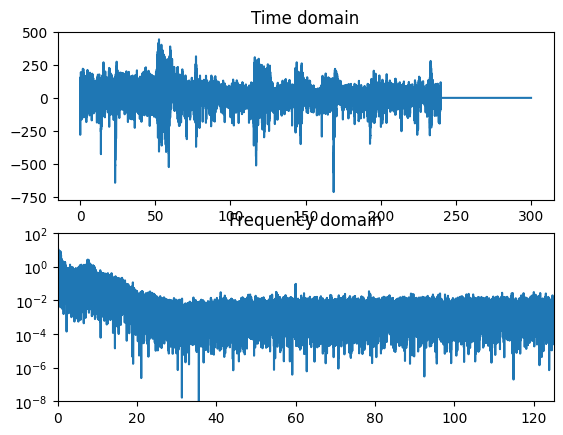

In [27]:
# time domain signal
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(t_orig,chn_sig)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])


# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,125])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [54]:
chn_sig_dn = edf_dn.readSignal(15)
npnts = chn_sig_dn.shape[-1]
t_dn = np.arange(0, npnts)/srate

In [41]:
# power spectrum (O = original)
hzO = np.linspace(0,downsampledSrate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig_dn)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

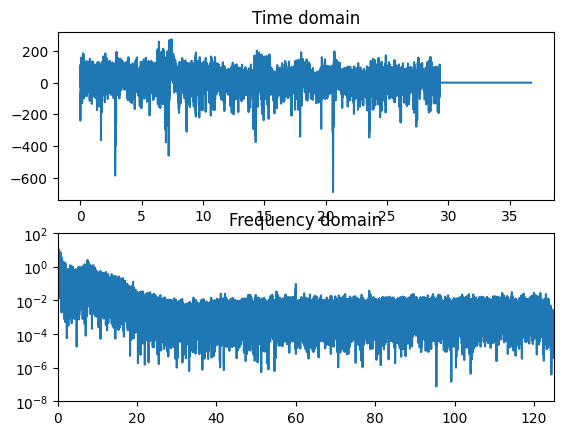

In [42]:
# time domain signal
plt.subplot(211)
plt.plot(t_dn,chn_sig_dn)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])

# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,125])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [55]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

winsize2 = int( 2*downsampledSrate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100
nfft_new = downsampledSrate*100

In [56]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_dn,fs=downsampledSrate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft_new)

(0.0, 100.0)

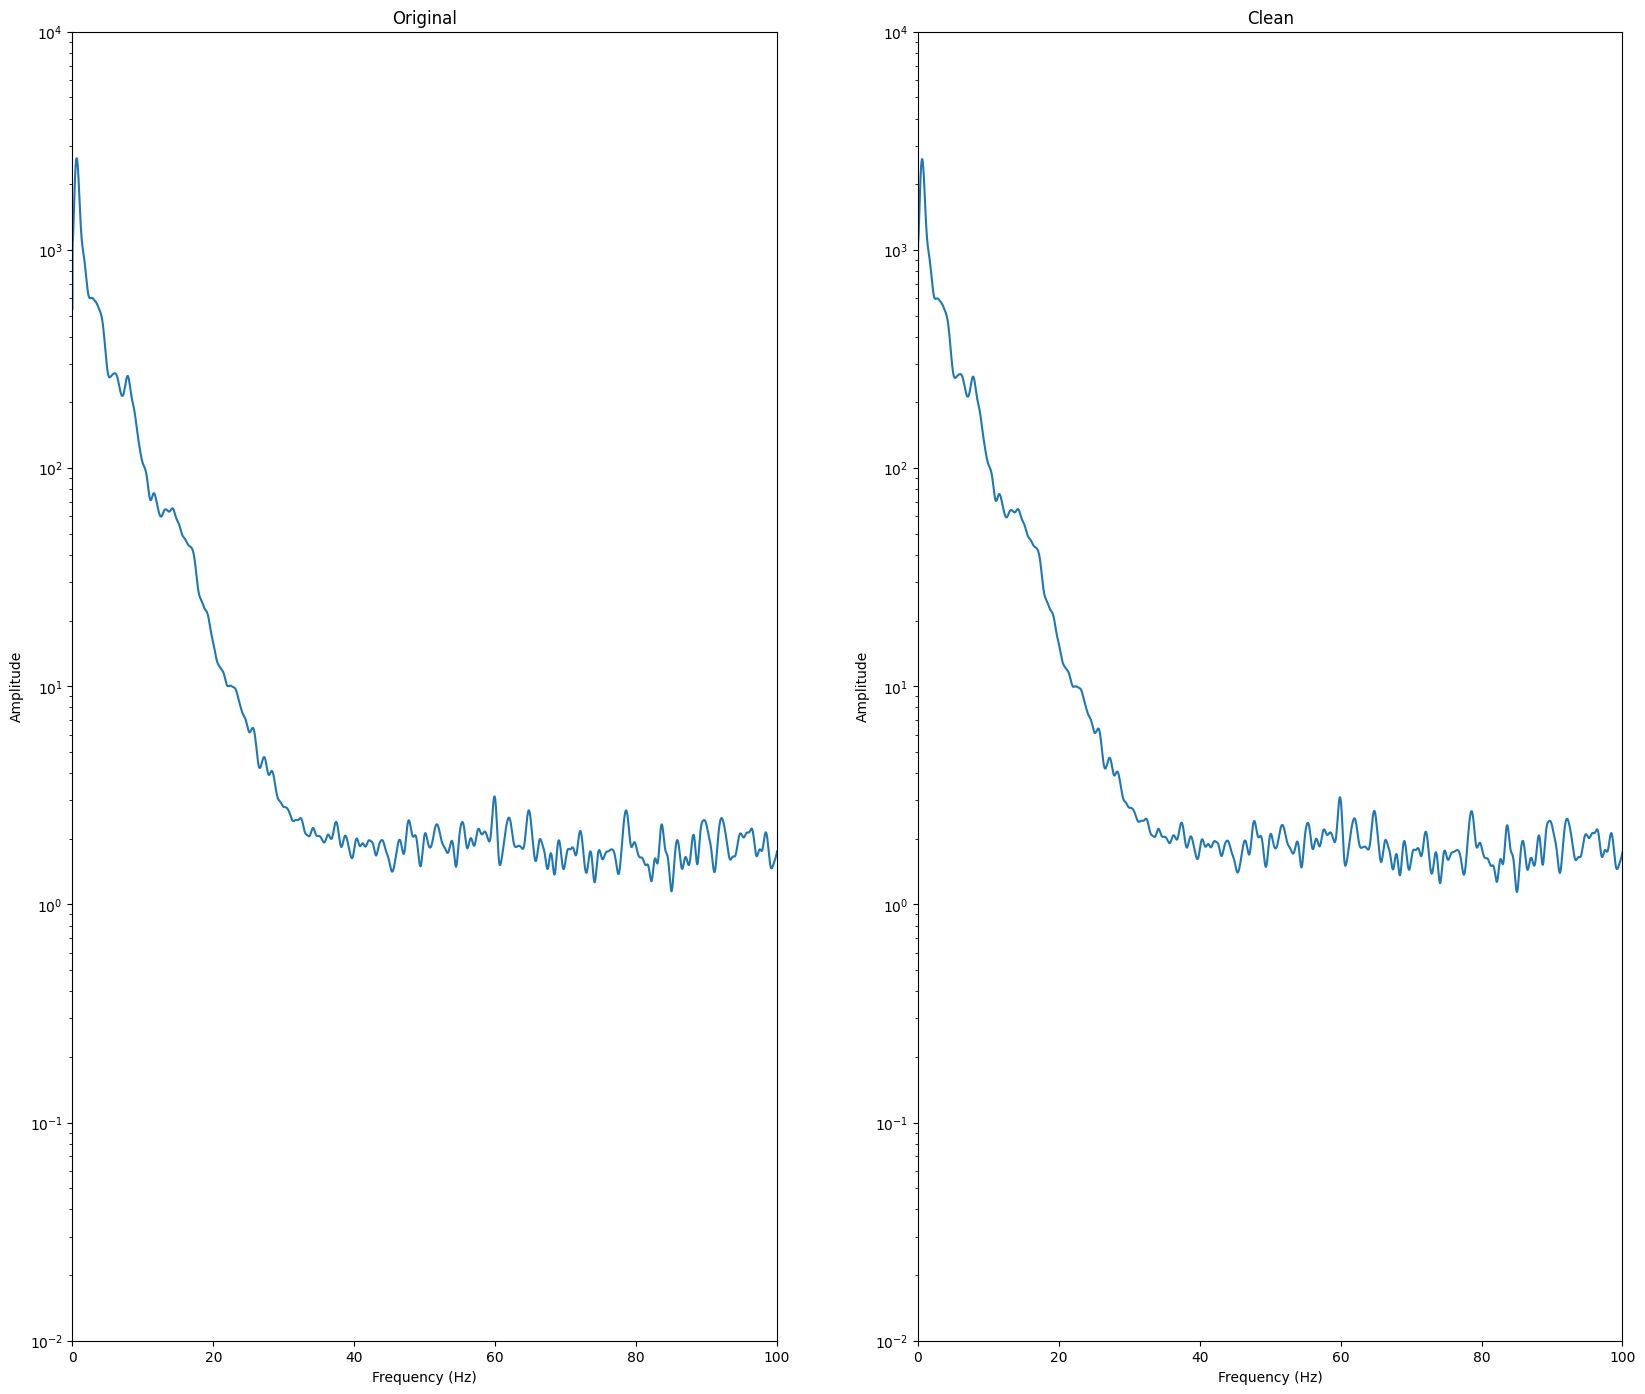

In [57]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([10**-2,10**4])
axs[0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_ylim([10**-2,10**4])
axs[1].set_xlim([0,100])

In [18]:
print(len(chn_sig))
print(len(signal_dsG))
print(len(signal_dsG)*2048/len(chn_sig))

614528
75016
250.0012497396376


In [24]:
len(edf_in.getSignalLabels())

149

In [22]:
edf_in.signals_in_file

149

In [44]:
edf_in.close()
edf_dn.close()

# Test workflow

In [1]:
from clean_seeg import cleanSEEG

In [2]:
!pip install h5io

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic/h5io-0.1.7+computecanada-py3-none-any.whl


In [2]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

### Downsampling

In [4]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.5, 1.5], #I set it to [0.5, 1.5] to improve comp cost
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5)

In [35]:
out_edf_dn = '/scratch/mcesped/code/sEEGPrep/Results/test_downsampled.edf'

In [5]:
%%time
signal_dsG, downsampledSrate = seegTF.downsample(target_srate=200, write_edf = True, out_edf_path = out_edf_dn)

len annot 3
len n_rem 4
Channel part
CPU times: user 1.42 s, sys: 683 ms, total: 2.11 s
Wall time: 1min 30s


### Test downsampling

In [36]:
import pyedflib
edf_dn = pyedflib.EdfReader(out_edf_dn)

In [7]:
edf_dn.getSignalLabels()[0:17]

['Patient Event',
 'LMiLs1',
 'LMiLs2',
 'LMiLs3',
 'LMiLs4',
 'LMiLs5',
 'LMiLs6',
 'LMiLs7',
 'LMiLs8',
 'LMiLs9',
 'LMiLs10',
 'RAOFr1',
 'RAOFr2',
 'RAOFr3',
 'RAOFr4',
 'RAOFr5',
 'RAOFr6']

In [37]:
downsampledSrate = edf_dn.getSampleFrequencies()[0]/edf_dn.datarecord_duration
downsampledSrate

200.0

In [38]:
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [62]:
edf_in.getSignalLabels()[0:17]

['Patient Event',
 'LMiLs1',
 'LMiLs2',
 'LMiLs3',
 'LMiLs4',
 'LMiLs5',
 'LMiLs6',
 'LMiLs7',
 'LMiLs8',
 'LMiLs9',
 'LMiLs10',
 'RAOFr1',
 'RAOFr2',
 'RAOFr3',
 'RAOFr4',
 'RAOFr5',
 'RAOFr6']

In [39]:
import numpy as np

In [40]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
# downsampledSrate = downsampledSrate[0]

In [41]:
chn_sig = edf_in.readSignal(15)
npnts = chn_sig.shape[-1]
t_orig = np.arange(0, npnts)/srate

In [13]:
# power spectrum (O = original)
import scipy.fftpack
hzO = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

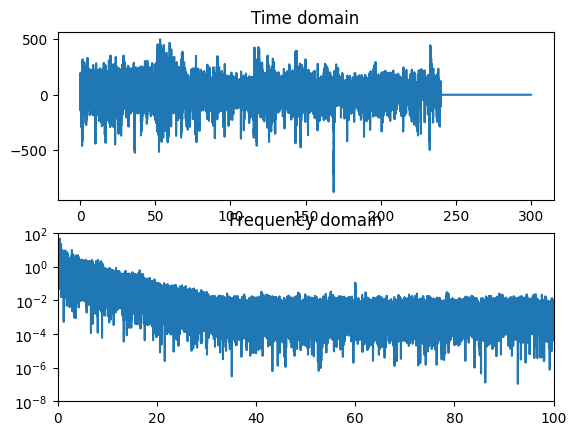

In [14]:
# time domain signal
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(t_orig,chn_sig)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])


# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [42]:
chn_sig_dn = edf_dn.readSignal(15)
npnts = chn_sig_dn.shape[-1]
t_dn = np.arange(0, npnts)/srate

In [16]:
downsampledSrate

200.0

In [17]:
# power spectrum (O = original)
hzO = np.linspace(0,downsampledSrate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig_dn)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

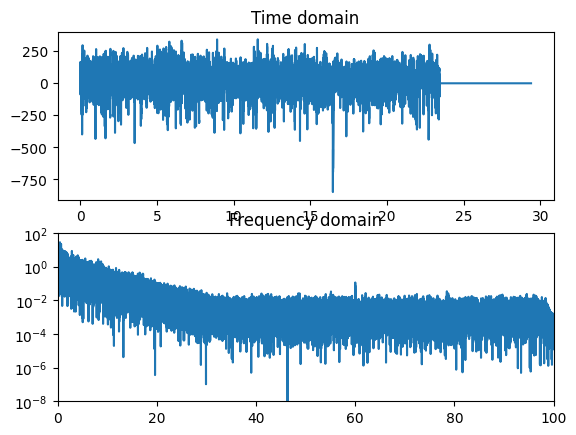

In [18]:
# time domain signal
plt.subplot(211)
plt.plot(t_dn,chn_sig_dn)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])

# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [19]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

winsize2 = int( 2*downsampledSrate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100
nfft_new = downsampledSrate*100

In [20]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_dn,fs=downsampledSrate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft_new)

(0.0, 100.0)

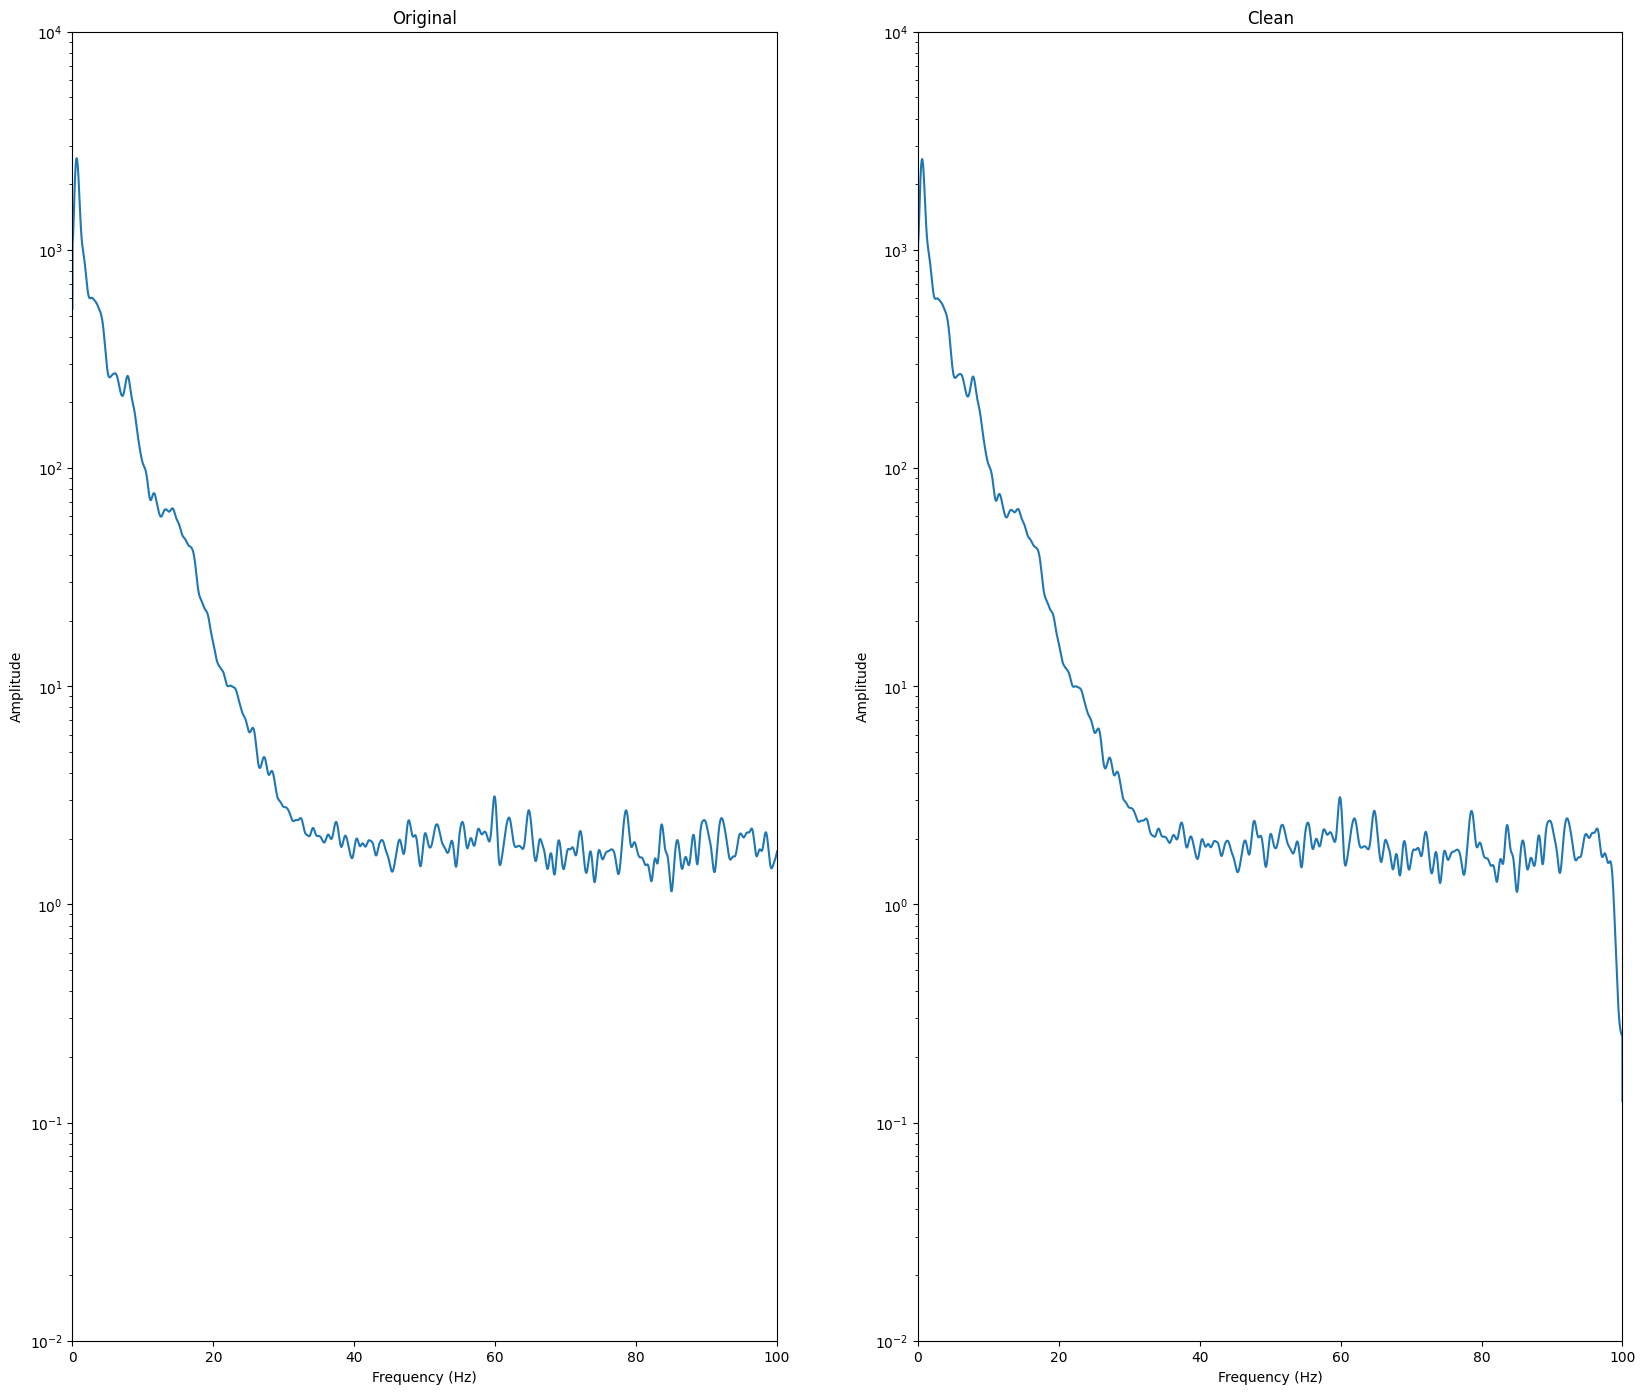

In [21]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([10**-2,10**4])
axs[0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_ylim([10**-2,10**4])
axs[1].set_xlim([0,100])

In [43]:
## Test frequency. We have to test through time points as we cannot be sure that they will end on the same time point.
t = np.arange(0, len(chn_sig))/srate
newTime = np.arange(0, len(chn_sig_dn))/downsampledSrate
newTime = newTime[newTime<=t[-1]]
print(len(t))
print(len(newTime))
print(len(newTime)*2048/len(t))

614528
60013
200.00166631951677


In [24]:
edf_dn.close()
edf_in.close()

### Filtering

In [19]:
# First perform cleaning 
# Testing class with notch filtering
seegTF = cleanSEEG(out_edf_dn, # Using downsampled edf
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'NotchFilter', 
                   lineFreq = 60,
                   bandwidth = 4,
                   n_harmonics = 1, # Only removing fundamental freq
                   noiseDetect = True,
                   # highpass = None, 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 2)

In [4]:
out_edf_path_clean = '/scratch/mcesped/code/sEEGPrep/Results/test_clean.edf'
out_tsv_path_noise = '/scratch/mcesped/code/sEEGPrep/Results/test_noise.tsv'
# out_edf_path_int = '/scratch/mcesped/code/sEEGPrep/Results/test_int.edf'

48000
Removing line noise
0


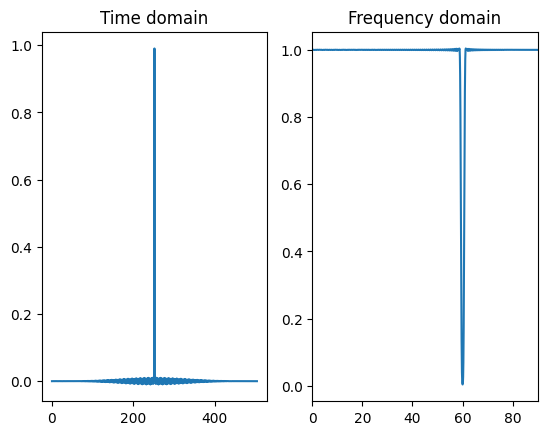

PLI removal completed.
(80, 48000)
Removing drifts
1005
aqui
lolo
(80, 48000)
Running autoreject
Start transforming mri to head
<Transform | MRI (surface RAS)->head>
[[ 0.99522067  0.03380816 -0.09161239 -0.00202999]
 [-0.03087106  0.99896884  0.03329013  0.02576594]
 [ 0.0926434  -0.03030285  0.99523813  0.04037436]
 [ 0.          0.          0.          1.        ]]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=seeg


100%|██████████| Creating augmented epochs : 80/80 [00:00<00:00,  148.54it/s]
100%|██████████| Computing thresholds ... : 80/80 [00:16<00:00,    4.74it/s]


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   82.78it/s]

  6%|▋         | Repairing epochs : 3/48 [00:00<00:00,   73.57it/s]

 10%|█         | Repairing epochs : 5/48 [00:00<00:00,   80.87it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,   98.82it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   99.72it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,  101.96it/s]

 31%|███▏      | Repairing epochs : 15/48 [00:00<00:00,  108.85it/s]

 35%|███▌      | Repairing epochs : 17/48 [00:00<00:00,  110.81it/s]

 42%|████▏     | Repairing epochs : 20/48 [00:00<00:00,  116.45it/s]

 48%|████▊     | Repairing epochs : 23/48 [00:00<00:00,  119.57it/s]

 52%|█████▏    | Repairing epochs : 25/48 [00:00<00:00,  118.80it/s]

 58%|█████▊ 

[ 7 24 27 55 56 57 71 74 75 76 77 78]
77
(1, 80, 1000)
80
[0.04922192 0.04554771 0.04206443 0.03894311 0.0361792  0.03390632
 0.03217765        inf 0.03131671 0.03213075 0.03108822 0.02889792
 0.027099   0.02592185 0.0253256  0.02478796 0.02530517 0.02638976
 0.02784437 0.02966253 0.04731922 0.04262164 0.03834945 0.03437237
        inf 0.02678038 0.02396123        inf 0.02048528 0.0201191
 0.05726663 0.0569404  0.05658624 0.05654043 0.05647955 0.05664367
 0.05693763 0.05764773 0.05833021 0.05924971 0.03264653 0.03226814
 0.03213686 0.03245239 0.03302201 0.03391227 0.03460547 0.03590504
 0.03715802 0.03857123 0.04234223 0.03695913 0.03169864 0.02683407
 0.02270042        inf        inf        inf 0.02060717 0.0236702
 0.04719093 0.04385213 0.04077654 0.03818435 0.03652173 0.03534512
 0.03481503 0.03467865 0.03568446 0.0369311  0.02003118        inf
 0.01371828 0.01081358        inf        inf        inf        inf
        inf 0.00609931]
Traceback (most recent call last):
  File "/scrat

Exception: 

In [21]:
%%time
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True, 
                                                     write_edf_clean = True,
                                                     out_edf_path_clean = out_edf_path_clean,
                                                     write_tsv = True,
                                                     out_tsv_path = out_tsv_path_noise
                                                    )

### Some checking on the filtering

In [24]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')


In [25]:
edf_in.getSignalLabels()[25]

'RPOFr5'

(400.0, -400.0)

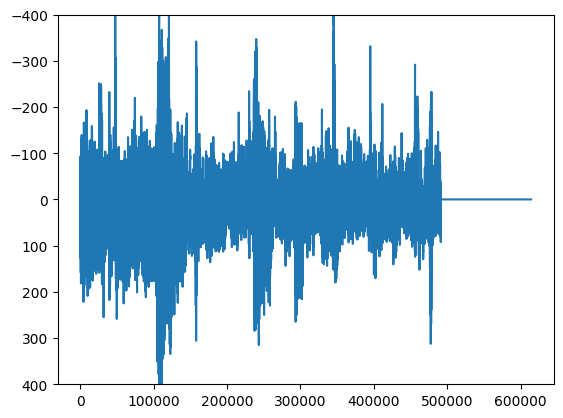

In [26]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(25)
plt.plot(chn_sig)
plt.ylim([400,-400])

In [27]:
edf_clean = pyedflib.EdfReader(out_edf_path_clean)

In [28]:
edf_clean.getSignalLabels().index('RPOFr5')

64

(400.0, -400.0)

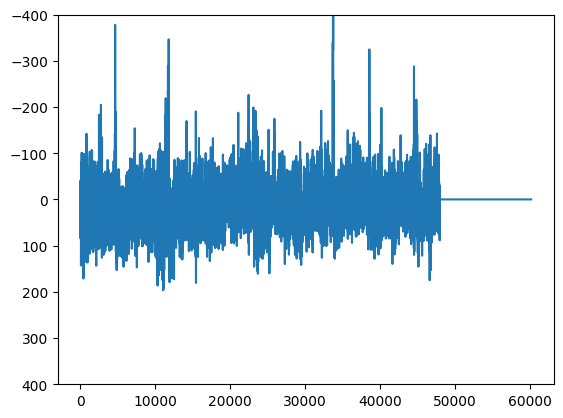

In [29]:
chn_sig_clean = edf_clean.readSignal(64)
plt.plot(chn_sig_clean)
plt.ylim([400,-400])

In [24]:
edf_clean.signals_in_file

80

(400.0, -400.0)

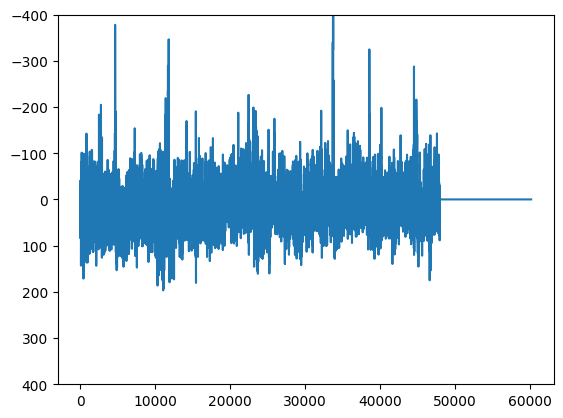

In [30]:
plt.plot(clean[64,:])
plt.ylim([400,-400])

(400.0, -400.0)

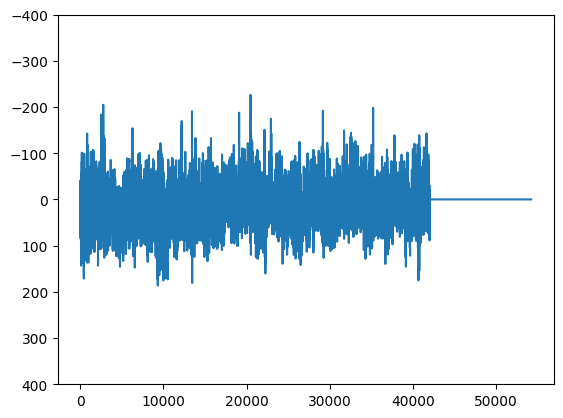

In [31]:
plt.plot(interpolated[64,:])
plt.ylim([400,-400])

In [32]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
new_srate = edf_clean.getSampleFrequencies()[0]/edf_clean.datarecord_duration
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

winsize2 = int( 2*new_srate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [33]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_clean,fs=new_srate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[64,:],fs=new_srate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft)

(0.0, 100.0)

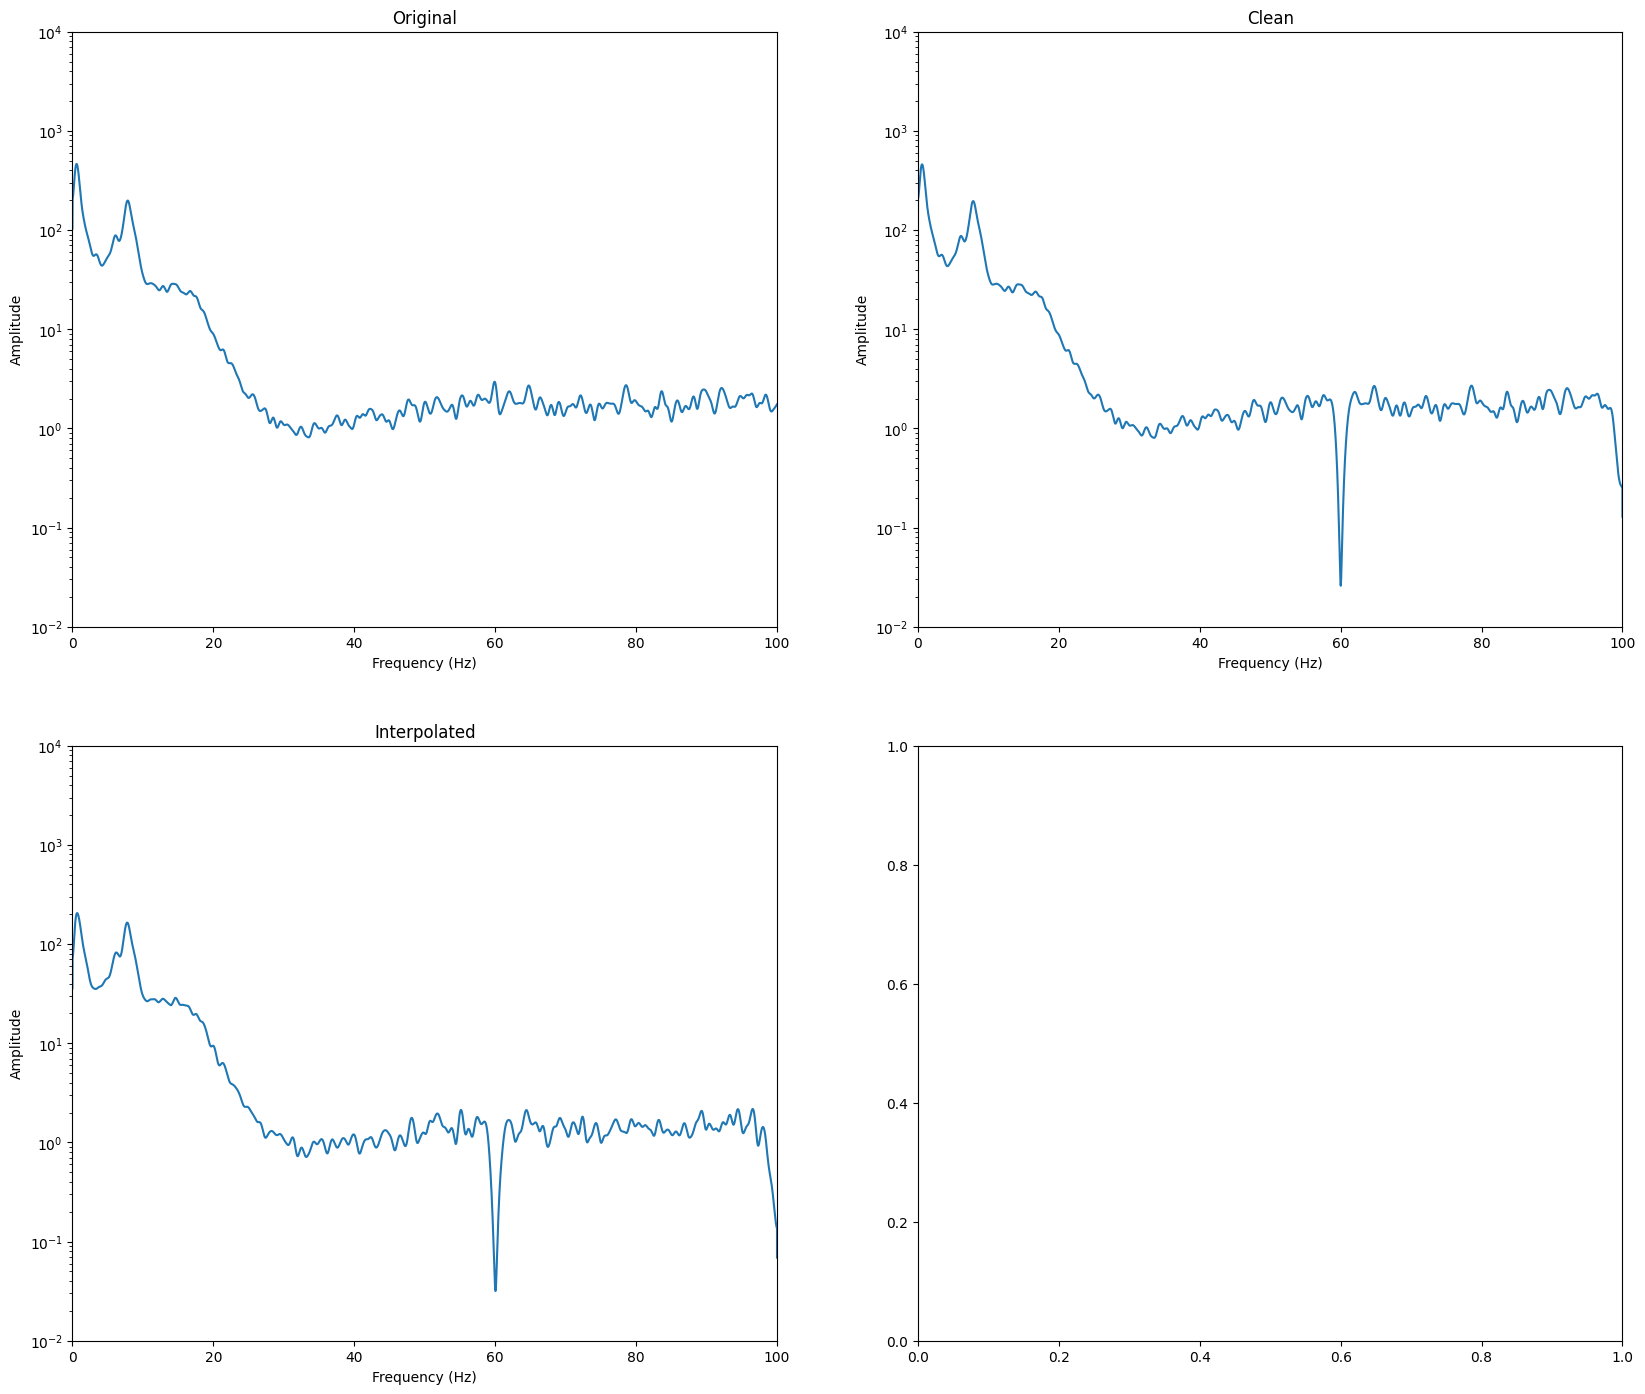

In [34]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [35]:
edf_in.close()
edf_clean.close()

### Rereferencing

In [3]:
seegTF = cleanSEEG(out_edf_path_clean, # Using clean edf
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'NotchFilter', 
                   lineFreq = 60,
                   bandwidth = 4,
                   n_harmonics = 1, # Only removing fundamental freq
                   noiseDetect = True,
                   highpass = None, 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 2)

NameError: name 'out_edf_path_clean' is not defined

In [4]:
# rereference(self, aparc_aseg_path, out_edf_path, out_tsv_path):
aparc_aseg_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P079/mri/aparc+aseg.orig.mgz'
out_edf_path_reref = '/scratch/mcesped/code/sEEGPrep/Results/test_reref.edf'
out_tsv_path_reref = '/scratch/mcesped/code/sEEGPrep/Results/test_reref.tsv'

In [7]:
df_cols = {
            'type': 'type',
            'label': 'label',
            'x': 'x',
            'y': 'y',
            'z': 'z',
            'group': 'orig_group'
        }

In [8]:
seegTF.rereference(out_edf_path_reref, write_tsv = True, out_tsv_path = out_tsv_path_reref, df_cols = df_cols)

Running rereference


len annot 3
len n_rem 4
Channel part


### Test reref

In [9]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [10]:
edf_in.getSignalLabels()[25]

'RPOFr5'

In [11]:
edf_in.getSignalLabels()[24]

'RPOFr4'

(60.0, -60.0)

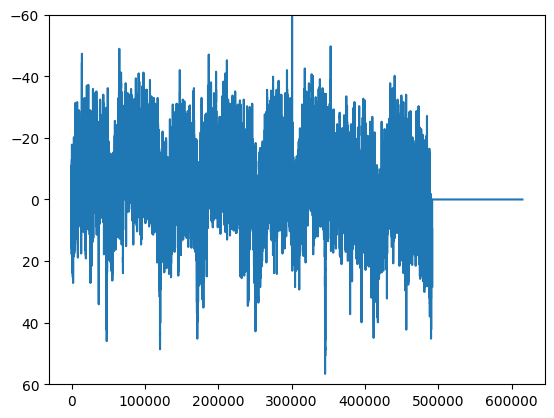

In [21]:
import matplotlib.pyplot as plt
chn_sig1 = edf_in.readSignal(24)
chn_sig2 = edf_in.readSignal(25)
chn_sig = chn_sig1 - chn_sig2
plt.plot(chn_sig)
plt.ylim([60,-60])

In [15]:
edf_reref = pyedflib.EdfReader(out_edf_path)

In [17]:
edf_reref.getSignalLabels().index('RPOFr4-5')

57

(60.0, -60.0)

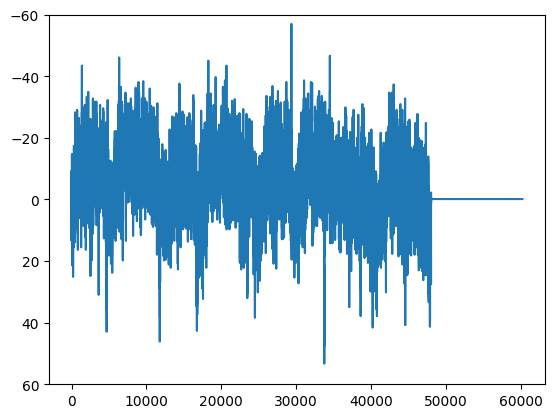

In [20]:
chn_sig_clean = edf_reref.readSignal(57)
plt.plot(chn_sig_clean)
plt.ylim([60,-60])

In [23]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
new_srate = edf_reref.getSampleFrequencies()[0]/edf_reref.datarecord_duration
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

winsize2 = int( 2*new_srate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [24]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_clean,fs=new_srate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft)

(0.0, 100.0)

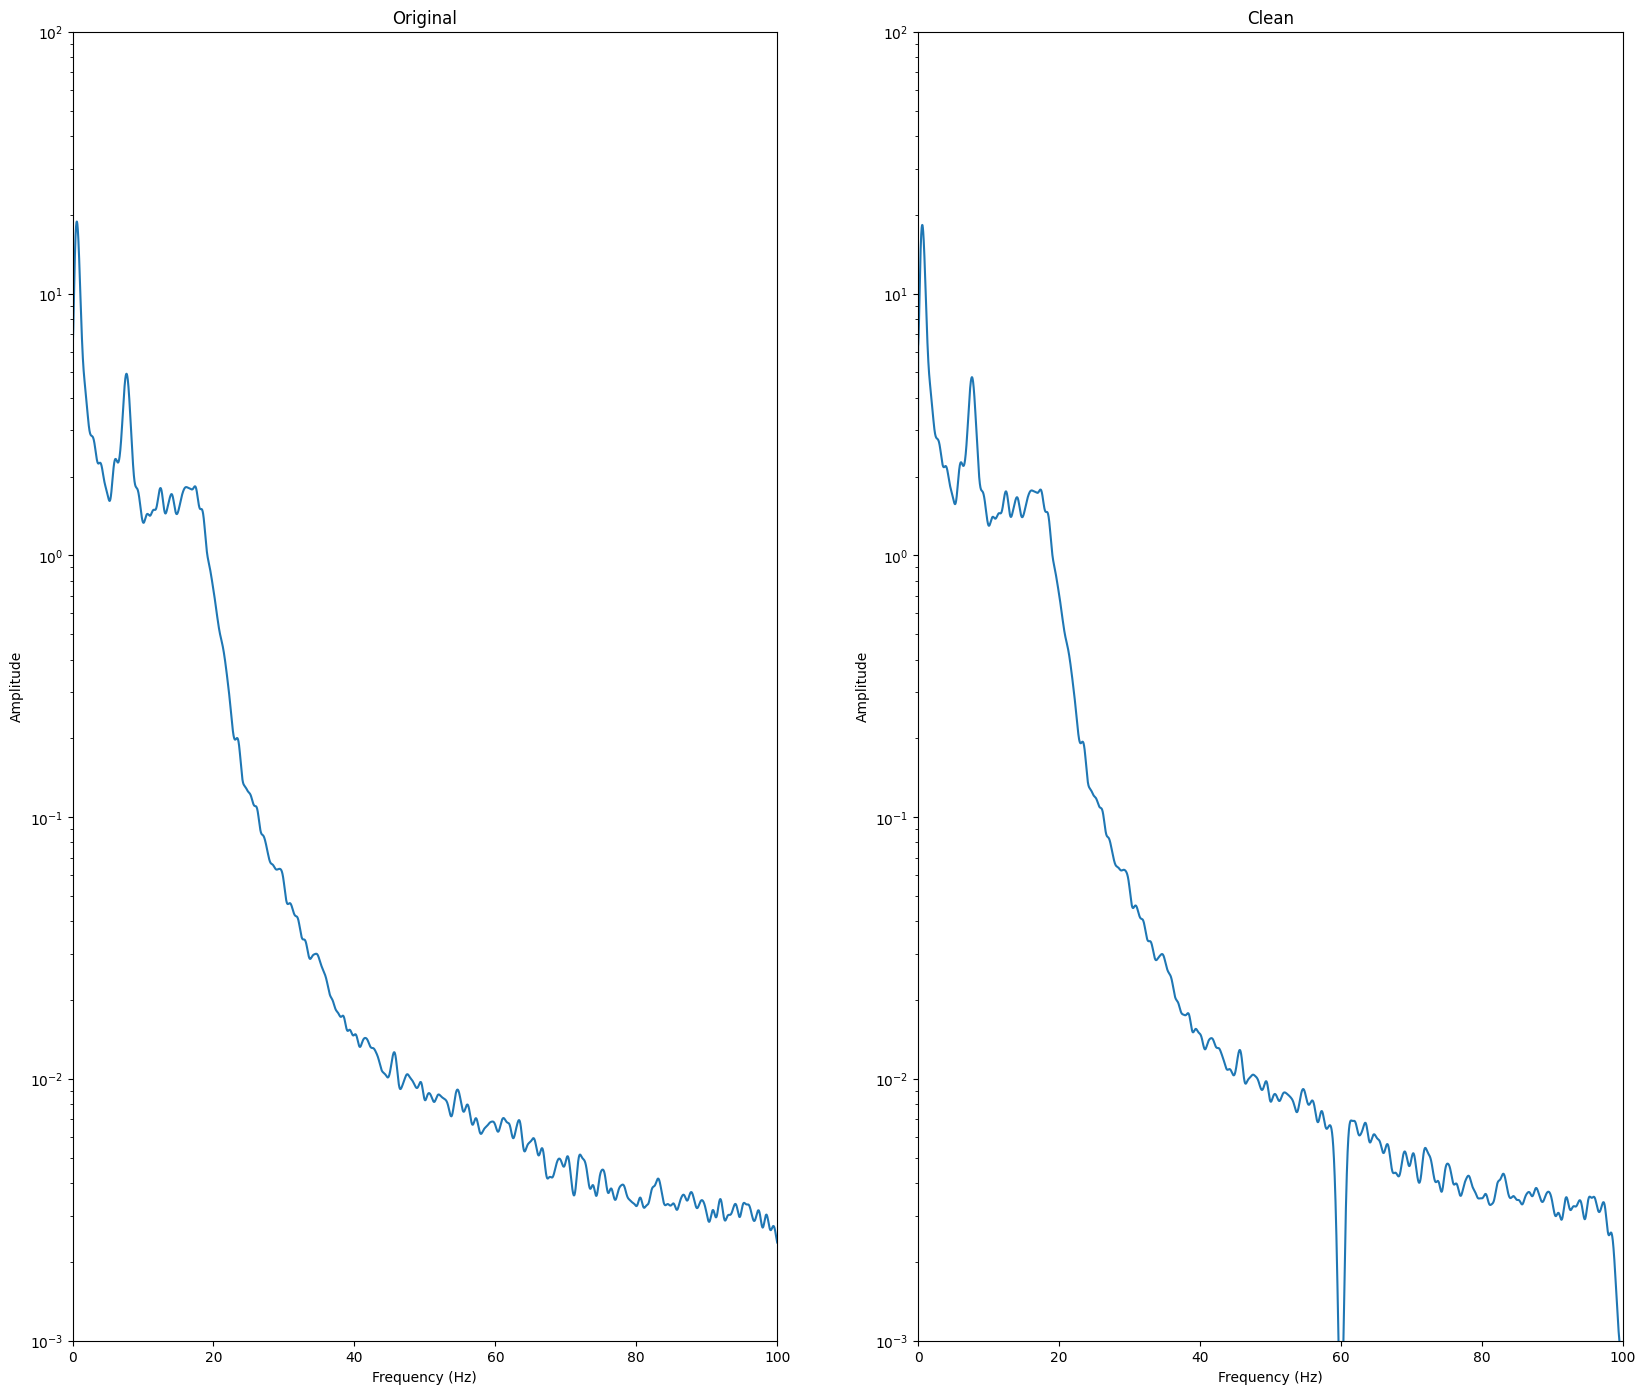

In [30]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([10**-3,10**2])
axs[0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_ylim([10**-3,10**2])
axs[1].set_xlim([0,100])

In [31]:
print(len(chn_sig))
print(len(chn_sig_clean))
print(len(chn_sig_clean)*2048/len(chn_sig))

614528
60200
200.62486981878774


In [33]:
edf_reref.close()
edf_in.close()

### Identify regions

In [5]:
# Testing class
seegTF = cleanSEEG(out_edf_path_reref, ## Use reref results
                   out_tsv_path_reref, ## Use reref results!!
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 4)

In [6]:
# rereference(self, aparc_aseg_path, out_edf_path, out_tsv_path):
aparc_aseg_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P079/mri/aparc+aseg.orig.mgz'
out_edf_regions = '/scratch/mcesped/code/sEEGPrep/Results/test_regions.edf'
out_tsv_path_regions = '/scratch/mcesped/code/sEEGPrep/Results/test_regions.tsv'

In [7]:
df = seegTF.identify_regions(aparc_aseg_path,
                             # conf = 'bipolar',
                             use_reref = False,
                             write_tsv = True,
                             out_tsv_path = out_tsv_path_regions,
                             df_cols = None, ## Using default as it was written in previous step
                             use_clean = False,
                             discard_wm_un = True,
                             write_edf = True,
                             out_edf_path = out_edf_regions)

['type', 'label', 'x', 'y', 'z', 'group']


len annot 3
len n_rem 4
['LMiLs7-8', 'LMiLs8-9', 'RACg9-10', 'RAOFr3-4', 'RAOFr4-5', 'RAOFr5-6', 'RAOFr8-9', 'RAOFr9-10', 'RASSMA1-2', 'RASSMA2-3', 'RASSMA7-8', 'RPOFr9-10', 'RSLs1-2', 'RSLs4-5', 'RSLs5-6', 'RSLs6-7']
range(0, 16)
Channel part
labelslabelslabels

labels['LMiLs1-2', 'LMiLs2-3', 'LMiLs3-4', 'LMiLs4-5', 'LMiLs5-6', 'LMiLs6-7', 'LMiLs7-8', 'LMiLs8-9', 'LMiLs9-10', 'RACg1-2', 'RACg2-3', 'RACg3-4', 'RACg4-5', 'RACg5-6', 'RACg6-7', 'RACg7-8', 'RACg8-9', 'RACg9-10', 'RAOFr1-2', 'RAOFr2-3', 'RAOFr3-4', 'RAOFr4-5', 'RAOFr5-6', 'RAOFr6-7', 'RAOFr7-8', 'RAOFr8-9', 'RAOFr9-10', 'RASSMA1-2', 'RASSMA2-3', 'RASSMA3-4', 'RASSMA4-5', 'RASSMA5-6', 'RASSMA6-7', 'RASSMA7-8', 'RASSMA8-9', 'RASSMA9-10', 'RMAFr1-2', 'RMAFr2-3', 'RMAFr3-4', 'RMAFr4-5', 'RMAFr5-6', 'RMAFr6-7', 'RMAFr7-8', 'RMAFr8-9', 'RMAFr9-10', 'RPLs1-2', 'RPLs2-3', 'RPLs3-4', 'RPLs4-5', 'RPLs5-6', 'RPLs6-7', 'RPLs7-8', 'RPLs8-9', 'RPLs9-10', 'RPOFr1-2', 'RPOFr2-3', 'RPOFr3-4', 'RPOFr4-5', 'RPOFr5-6', 'RPOFr6-7', 'RPOFr7-8', 

# Extra

In [ ]:
a = np.array([1,2, 3])
b = np.array([0,4,5])
a < b

In [ ]:
import psutil
psutil.virtual_memory()

In [ ]:
avail_mem = psutil.virtual_memory()[1]

In [ ]:
ns = 1000000000000
nc = 64
blocksize = 10
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

In [ ]:
if req_mem>avail_mem:
        # Recalculate the blocksize
        blocksize = int(-(16*nc*nc*ns)/(16*nc*nc - avail_mem*0.8))
blocksize

In [ ]:
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

In [ ]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
import pyedflib
f = pyedflib.EdfReader(edf_path)

In [ ]:
annot = f.readAnnotations()
annot

In [ ]:
edf_path = '/home/mcesped/scratch/code/sEEGPrep/Results/test.edf'
import pyedflib
f = pyedflib.EdfReader(edf_path)

In [ ]:
annot = f.readAnnotations()
annot

In [ ]:
import numpy as np
for annot_id in np.arange(len(annot)):
    print(annot[0][annot_id], annot[1][annot_id], annot[2][annot_id])

In [ ]:
int(annot[0][0])

In [ ]:
f.close()

In [12]:
# Test filter
import numpy as np
from scipy.signal import kaiserord, firwin, filtfilt
srate=2048
Transition = [0.5, 1.5]
Attenuation = 80
nyq_rate = srate / 2

# Width of the roll-off region.
width = 2*(Transition[1]-Transition[0]) / nyq_rate

num_of_taps, beta = kaiserord(Attenuation, width)
if num_of_taps % 2 == 0:
    num_of_taps = num_of_taps + 1
num_of_taps 

5141

In [ ]:
# Estimate the filter coefficients.
filtkern = firwin(num_of_taps, Transition[1]/nyq_rate, window=('kaiser', beta), pass_zero=False)

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')

In [ ]:
import scipy.fftpack
hz = np.linspace(0,10,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filtkern))**2
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.xlim([0,0.5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

In [9]:
import scipy.signal as signal
order   = int( 5*srate/0.3 )
# force odd order
if order%2==0:
    order += 1
filtkern = signal.firwin(order, 0.3, fs=srate, pass_zero=False)

In [11]:
3.3/(0.3/2048)

22528.0

Text(0.5, 1.0, 'Filter kernel (firls)')

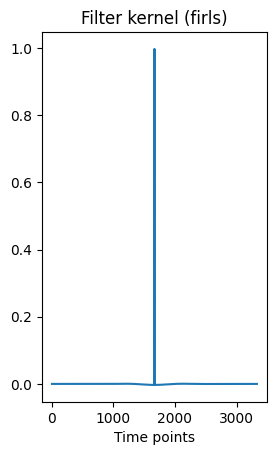

In [5]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')

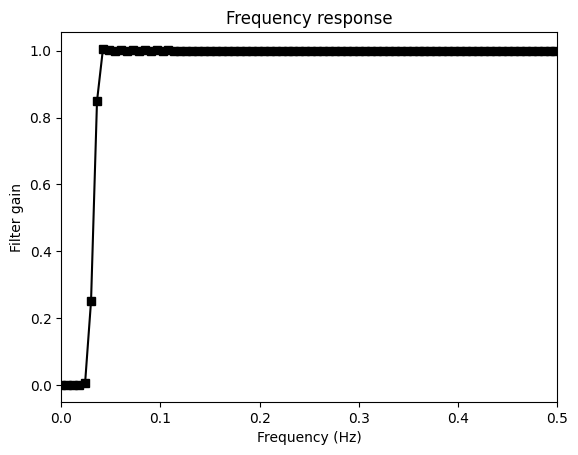

In [6]:
import scipy.fftpack
hz = np.linspace(0,10,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filtkern))**2
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.xlim([0,0.5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

In [4]:
def get_srate_params(srate, max_srate=254): # max_srate=254 as uses int8
    n_min = int(np.floor(srate/max_srate))
    for i in range(n_min+1, int(srate/2)):
        if srate % i == 0:
            duration = 1/i
            if len(str(duration).split(".")[1]) <= 4:
                return 1/i, srate/i
    raise Exception('No appropriate parameters found in get_srate_params')

In [5]:
import numpy as np
a, b = get_srate_params(250)
a,b

(1.0, 250.0)

In [25]:
len(str(a).split(".")[1])

4